In [1]:
%cd ../src

from incentivecomplex import IncentiveComplex
from results import run_custom_routine, run_main_experiments
from routines import rewarding_routine, shock_routine
from arena import load_data
from plot import *

import warnings
import os

# the directory of the file
__dir__ = os.path.dirname(os.path.abspath(""))

warnings.filterwarnings('ignore')

/home/odin/projects/WheelOfMotivations/src


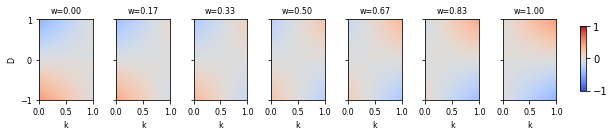

In [2]:
%matplotlib inline

plot_learning_rule(wrt_k=False, wrt_d=False, colour_bar=True, figsize=(9, 2))

In [3]:
# Susceptible Memory Sub-circuit
sm = IncentiveComplex(learning_rule="dlr", nb_apl=0, pn2kc_init="default", nb_timesteps=3, nb_trials=24,
                      nb_kc=10, nb_kc_odour_1=5, nb_kc_odour_2=5, has_real_names=False,
                      has_sm=True, has_rm=False, has_ltm=False, has_rrm=False, has_rfm=False, has_mam=False,
                      as_subcircuits=True)

# Restrained Memory Sub-circuit
rm = IncentiveComplex(learning_rule="dlr", nb_apl=0, pn2kc_init="default", nb_timesteps=3, nb_trials=24,
                      nb_kc=10, nb_kc_odour_1=5, nb_kc_odour_2=5, has_real_names=False,
                      has_sm=True, has_rm=True, has_ltm=False, has_rrm=False, has_rfm=False, has_mam=False,
                      as_subcircuits=True)

# Long-Term Memory Sub-circuit
ltm = IncentiveComplex(learning_rule="dlr", nb_apl=0, pn2kc_init="default", nb_timesteps=3, nb_trials=24,
                       nb_kc=10, nb_kc_odour_1=5, nb_kc_odour_2=5, has_real_names=False,
                       has_sm=True, has_rm=True, has_ltm=True, has_rrm=False, has_rfm=False, has_mam=False,
                       as_subcircuits=True)

# Reciprocal Restrained Memory Sub-circuit
rrm = IncentiveComplex(learning_rule="dlr", nb_apl=0, pn2kc_init="default", nb_timesteps=3, nb_trials=24,
                       nb_kc=10, nb_kc_odour_1=5, nb_kc_odour_2=5, has_real_names=False,
                       has_sm=True, has_rm=True, has_ltm=True, has_rrm=True, has_rfm=False, has_mam=False,
                       as_subcircuits=True)

# Reciprocal Forgetting Memory Sub-circuit
rfm = IncentiveComplex(learning_rule="dlr", nb_apl=0, pn2kc_init="default", nb_timesteps=3, nb_trials=24,
                       nb_kc=10, nb_kc_odour_1=5, nb_kc_odour_2=5, has_real_names=False,
                       has_sm=True, has_rm=True, has_ltm=True, has_rrm=True, has_rfm=True, has_mam=True,
                       as_subcircuits=True)

# Memory Assimilation Mechanism
mam = IncentiveComplex(learning_rule="dlr", nb_apl=0, pn2kc_init="default", nb_timesteps=3, nb_trials=24,
                       nb_kc=10, nb_kc_odour_1=5, nb_kc_odour_2=5, has_real_names=False,
                       has_sm=True, has_rm=True, has_ltm=True, has_rrm=True, has_rfm=True, has_mam=True,
                       as_subcircuits=True)

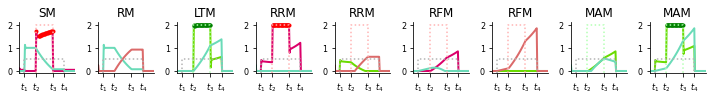

In [4]:
plot_sm(run_custom_routine(sm, routine=shock_routine), sub=191)
plot_rm(run_custom_routine(rm, routine=shock_routine), sub=192)
plot_ltm(run_custom_routine(ltm, routine=rewarding_routine), sub=193)
plot_rrm(run_custom_routine(rrm, routine=shock_routine), sub=[194, 195])
plot_rfm(run_custom_routine(rfm, routine=shock_routine), sub=[196, 197])
plot_mam(run_custom_routine(mam, routine=rewarding_routine), sub=[198, 199])

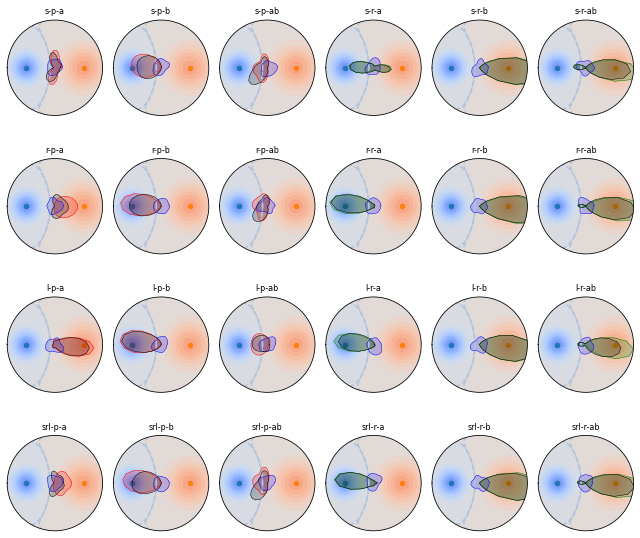

In [5]:
# the directory of the data
arena_dir = os.path.realpath(os.path.join(__dir__, "data", "arena"))

df = load_data(file_names=os.listdir(arena_dir), rw=False)
plot_arena_stats(df, "arena-stats", figsize=(9, 8))

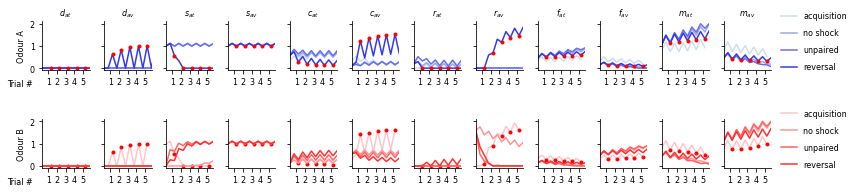

In [11]:
# create the Incentive Complex
model = IncentiveComplex(
    learning_rule="dlr", nb_apl=0, pn2kc_init="default", nb_timesteps=3, nb_trials=26,
    nb_kc=10, nb_kc_odour_1=5, nb_kc_odour_2=5, has_real_names=False,
    has_sm=True, has_rm=True, has_ltm=True, has_rrm=True, has_rfm=True, has_mam=True)

# run all the experiments and get a copy of the model with the history of their responses and parameters for each
# one of them
scenarios = run_main_experiments(model, reversal=True, unpaired=True, no_shock=True)

# plot the results based on the input flags
plot_phase_overlap_mean_responses(scenarios, only_nids=True, figsize=(12, 3))

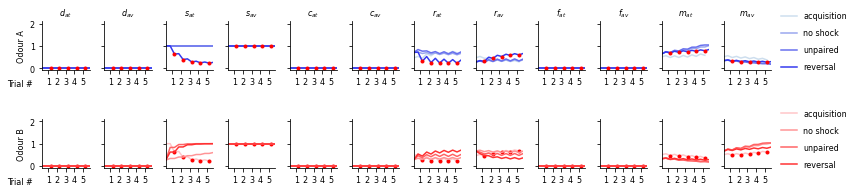

In [7]:

plot_weights(scenarios, only_nids=True, figsize=(12, 3))

#neurons: 43
#flies: 357
min #flies/neuron: 2
max #flies/neuron: 14
mean #flies/neuron: 8.30232558139535


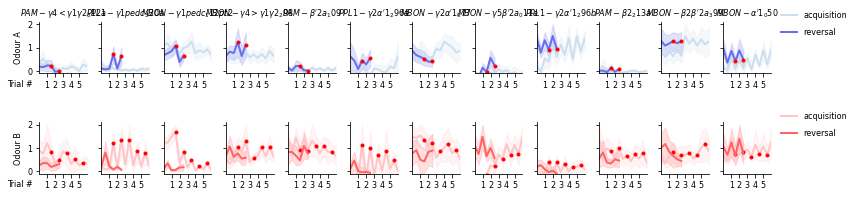

In [8]:
from imaging import load_data, plot_phase_overlap_mean_responses_from_data

experiment = "B+"

# load the data
df = load_data(experiment)

# generate statistics
nb_neurons, nb_flies, nb_flies_min, nb_flies_max = 0, 0, 14, 0

for name in df[experiment].index:
    nb_flies += df[experiment][name].shape[1]
    nb_neurons += 1
    if nb_flies_min > df[experiment][name].shape[1]:
        nb_flies_min = df[experiment][name].shape[1]
    if nb_flies_max < df[experiment][name].shape[1]:
        nb_flies_max = df[experiment][name].shape[1]

print("#neurons:", nb_neurons)
print("#flies:", nb_flies)
print("min #flies/neuron:", nb_flies_min)
print("max #flies/neuron:", nb_flies_max)
print("mean #flies/neuron:", nb_flies / nb_neurons)



# plot the data from the selected neurons for the TSM model
neurons = [33, 39, 13, 16, 21, 41, 14, 17, 42, 28, 12, 2]
plot_phase_overlap_mean_responses_from_data(df, experiment, nids=neurons, only_nids=True, figsize=(12, 3))

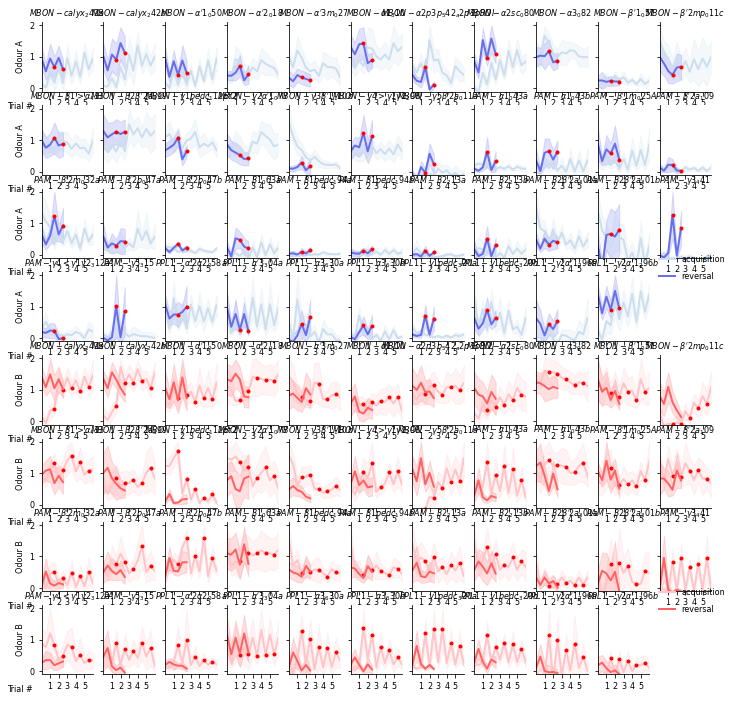

In [9]:
plot_phase_overlap_mean_responses_from_data(df, experiment, only_nids=False, figsize=(12, 12))